<a href="https://colab.research.google.com/github/angelicasharon/Angelicashrn/blob/main/UAS/UAS_MNIST_Angka_Angelica_Sharon_1103210032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS MACHINE LEARNING **

Nama: Angelica Sharon Amelia Simanjuntak

NIM:1103210032

Dataset:MNIST Angka (https://www.tensorflow.org/datasets/catalog/mnist?hl=id)

Referensi: https://paperswithcode.com/dataset/mnist, https://m.youtube.com/watch?v=Rf5bSKrLsnk

# **Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Mengimpor library TensorFlow, yang merupakan sebuah platform open-source untuk machine learning dan deep learning.

# **Memuat dataset MNIST**

In [2]:
# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Jumlah data train: ", x_train.shape[0])
print("Jumlah data test: ", x_test.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
Jumlah data train:  60000
Jumlah data test:  10000


# **Menampilkan gambar dari dataset MNIST**

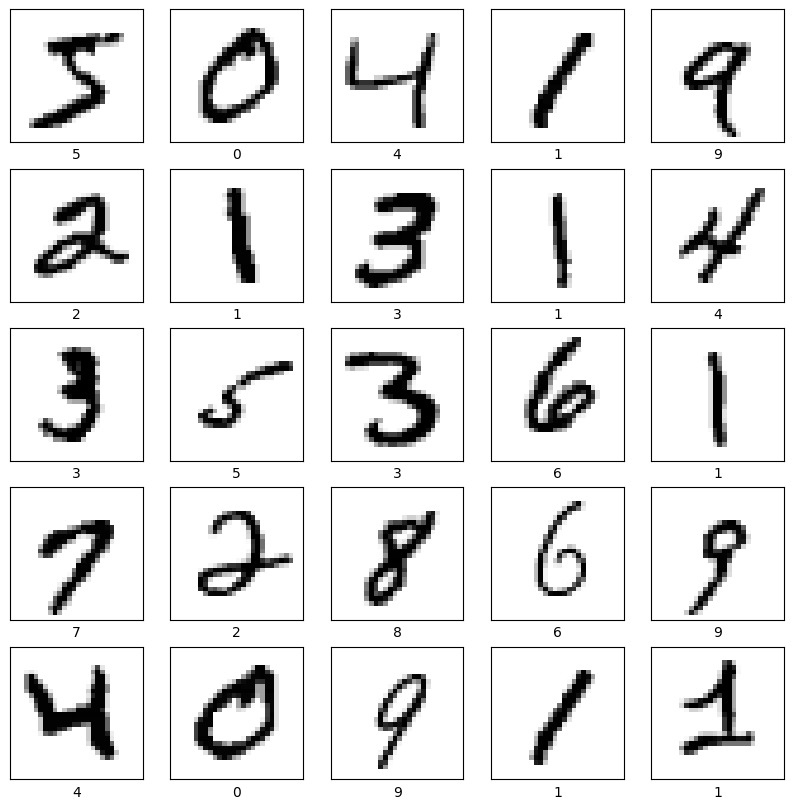

In [3]:
# Menampilkan gambar dari dataset MNIST
def show_sample_images(x, y):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
        plt.xlabel(y[i])
    plt.show()

show_sample_images(x_train, y_train)

**Penjelasan:** Fungsi ini menampilkan gambar-gambar untuk memberikan gambaran tentang data yang digunakan. Setiap gambar diberi label sesuai dengan digit yang ditulis tangan.

**Output:** Tampilan visual dari 25 gambar digit acak dari data training.


# **Normalisasi gambar**

In [4]:
# Normalisasi gambar (nilai piksel 0-255 menjadi 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# **Mengubah label menjadi one-hot encoding**

In [5]:
# Mengubah label menjadi one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# **Model Sequential**

In [6]:
# Membangun model Sequential
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# **Kompilasi model**

In [7]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Melatih model dengan data training**

In [8]:
# Melatih model dengan data training
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2957 - accuracy: 0.9142 - val_loss: 0.1415 - val_accuracy: 0.9598
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1411 - accuracy: 0.9578 - val_loss: 0.1065 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1039 - accuracy: 0.9681 - val_loss: 0.0886 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0870 - accuracy: 0.9729 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0751 - accuracy: 0.9766 - val_loss: 0.0758 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0687 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9812 - val_loss: 0.0693 - val_accura

**Penjelasan:** Setiap epoch, TensorFlow mencetak nilai loss dan akurasi. Proses ini menunjukkan bagaimana model belajar dan seberapa baik performanya pada data training dan data validasi selama 10 epoch.

**Output:** Informasi pelatihan yang mencakup loss dan akurasi untuk setiap epoch, baik untuk data training maupun validasi.

# **Evaluasi model dengan data test**

In [9]:
# Evaluasi model dengan data test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - loss: 0.0673 - accuracy: 0.9806 - 474ms/epoch - 2ms/step

Test accuracy: 0.9805999994277954


**Penjelasan:** Kode ini mengevaluasi model pada data testing dan mencetak akurasi, menunjukkan seberapa baik model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

# **Plot akurasi dan loss**

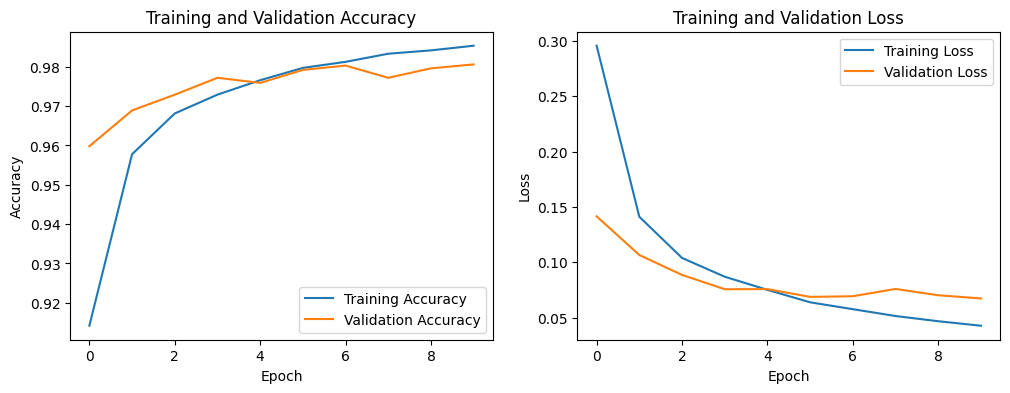

In [10]:
# Plot akurasi dan loss selama training dan validasi
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

**Penjelasan:** Plot ini menunjukkan perkembangan akurasi dan loss selama pelatihan untuk membantu memahami performa model dan apakah terjadi overfitting atau underfitting.

# **Menampilkan gambar dan prediksi**

1/1 [==============================] - 0s 84ms/step


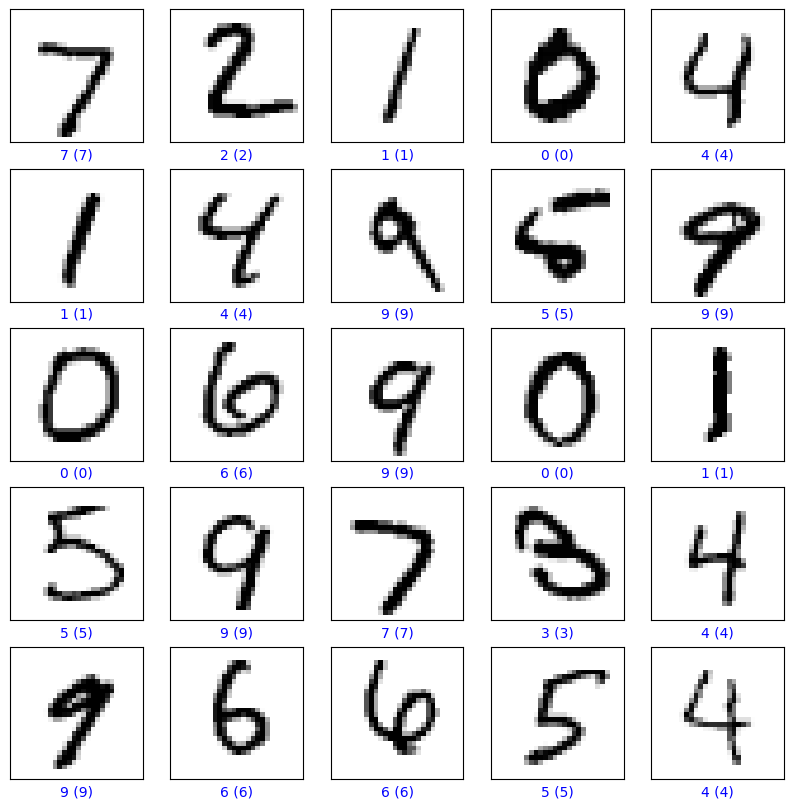

In [11]:
# Fungsi untuk menampilkan gambar dan prediksi
def show_predictions(model, x, y):
    predictions = model.predict(x)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(y[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f'{predicted_label} ({true_label})', color=color)
    plt.show()

show_predictions(model, x_test[:25], y_test[:25])

**Output:** Tampilan visual dari 25 gambar digit dari data testing dengan prediksi model dan label asli.


**Penjelasan:** Setiap gambar ditampilkan dengan label prediksi dan label asli. Warna teks biru menunjukkan prediksi benar. Ini membantu dalam memverifikasi kemampuan model untuk mengenali digit dengan benar.